In [1]:
import numpy as np
import nm_lib as nm
from matplotlib import style
style.use('dark_background')

nump = 256
cfl_cut = 0.1
Nt = 1000
gamma = 5/3

xx,u,rho,Pg = nm.init_sod_test(nump,1.0,0.125,1.0/gamma,0.125/gamma)

solver = nm.Multispecies(xx,nm.deriv_cent,bnd_limits = [8,8],bnd_type="edge")
solver.add_species("diffusive cq=0.5, cL = 3, cD = 2",u,rho,Pg,gamma, cq = 0.5, cL = 3, cD = 2)
solver.add_species("No diffusion",u,rho,Pg,gamma, cq = 0, cL = 0, cD = 0)

t,xx,values = solver.run(Nt,cfl_cut=cfl_cut,coupled=False, Q_col = False, col = False)
values.append(nm.ana_sod_shock(xx,gamma,t, Pg[0],Pg[-1],rho[0],rho[-1]))

names,uts,rhots,Pts,ets = nm.unpack_CFD_values(values)
nm.animMultMHDparams(names,ets,uts,rhots,Pts,t,xx,n_frames=30)

(1000,)
(257,)


(-20.0, 20.0)

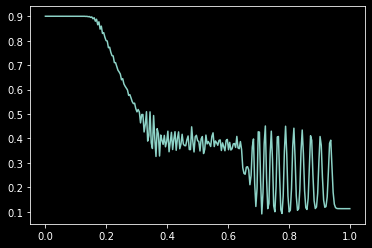

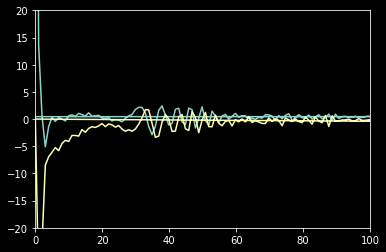

In [3]:
import matplotlib.pyplot as plt


ut = ets[0]
print(ut[:,12].shape)

t_grid = np.linspace(t[0],t[-1],num=len(t))

plt.plot(xx,ut[900,:])

plt.figure()
sp = np.fft.fft(ut[900,:])
#sp=np.abs(sp)
print(sp.shape)
dx = xx[1]-xx[0]
freq = np.fft.fftfreq(xx.shape[-1], d = dx)
plt.plot(freq, sp.real, freq, sp.imag)
plt.xlim(0,100)
plt.ylim(-20,20)

In [11]:
solver = nm.Multispecies(xx,nm.deriv_cent,bnd_limits = [8,8],bnd_type="edge")
solver.add_species("diffusive cq=0.5, cL = 3",u,rho,Pg,gamma, cq = 0.5, cL = 3, cD = 1)
t,xx,values = solver.run(Nt,cfl_cut=cfl_cut, )
names,uts,rhots,Pts,ets = nm.unpack_CFD_values(values)


(1000,)
(257,)


(-20.0, 20.0)

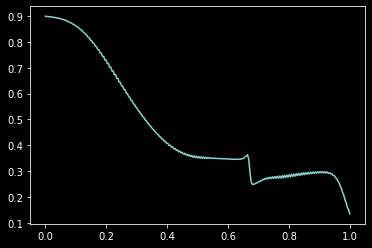

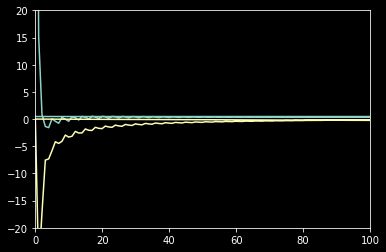

In [12]:
ut = ets[0]
print(ut[:,12].shape)

t_grid = np.linspace(t[0],t[-1],num=len(t))

plt.plot(xx,ut[900,:])

plt.figure()
sp = np.fft.fft(ut[900,:])
#sp=np.abs(sp)
print(sp.shape)
dx = xx[1]-xx[0]
freq = np.fft.fftfreq(xx.shape[-1], d = dx)
plt.plot(freq, sp.real, freq, sp.imag)
plt.xlim(0,100)
plt.ylim(-20,20)